Contents:

* Introduction
* Import Librarys
* Load DataSet
* Data Analysis
* Data Preprocessing
* Train Test Split
* Models Training
* Evaluation Models

# Hi everyone!

Thanks for your attention.

**In this project, I work with the data of diabetes.**

I want to **predict** that a **person** **has diabetes** or **not**

So we have **binary Classification** problem

I hope it is useful

**Let's Go**.....

# ***Import Librarys***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## For Preprocessing
from sklearn.preprocessing import StandardScaler

####################
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


## Machine Learning Algorithm
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

## To evaluate models
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# ***Load DataSet***

In [2]:
data = pd.read_csv('../input/diabetes-data-set/diabetes.csv')

# ***Data Analysis***

**In this section, we will learn more about data**

In [3]:
# Display the first 10 rows of data
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
# The number of rows and columns
rows, columns = data.shape
print('Rows--> ', rows)
print('Columns--> ', columns)

Rows-->  768
Columns-->  9


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Note**

* we don't have any Miss Value

In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


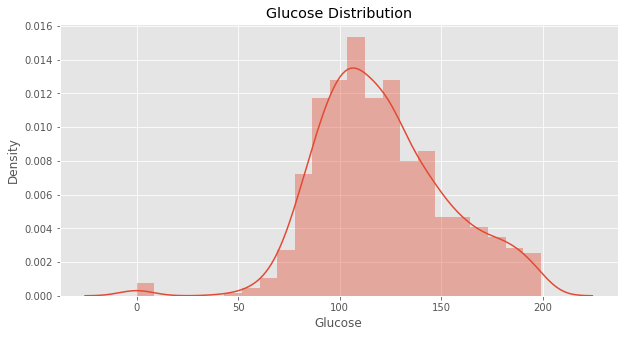

In [8]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.title('Glucose Distribution')
sns.distplot(data['Glucose'])
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


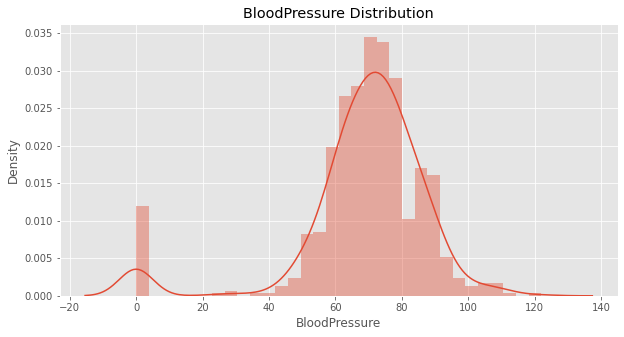

In [9]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.title('BloodPressure Distribution')
sns.distplot(data['BloodPressure'])
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


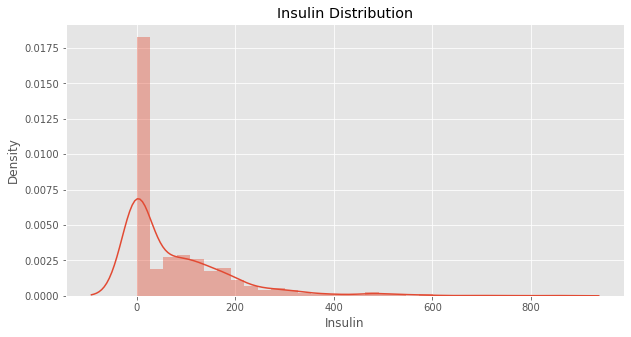

In [10]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.title('Insulin Distribution')
sns.distplot(data['Insulin'])
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


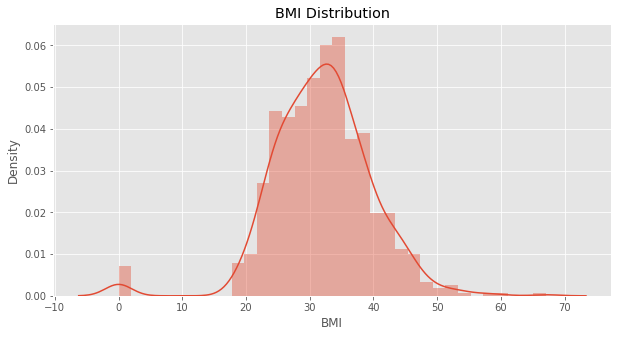

In [11]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.title('BMI Distribution')
sns.distplot(data['BMI'])
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


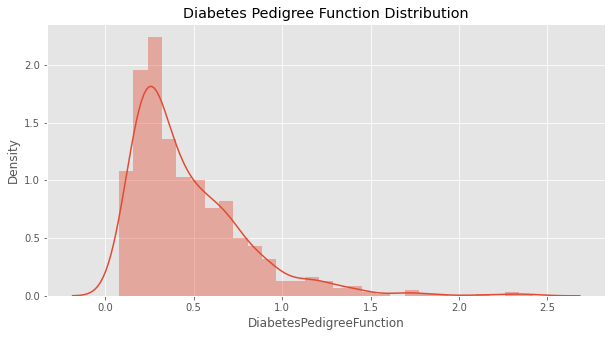

In [12]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.title('Diabetes Pedigree Function Distribution')
sns.distplot(data['DiabetesPedigreeFunction'])
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


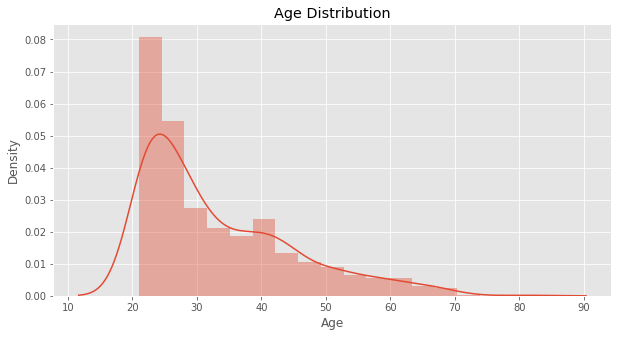

In [13]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.title('Age Distribution')
sns.distplot(data['Age'])
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


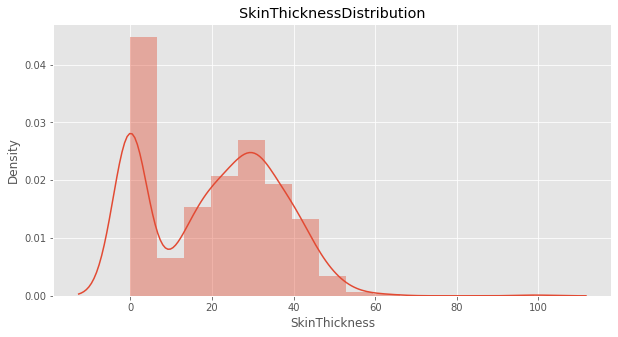

In [14]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.title('SkinThicknessDistribution')
sns.distplot(data['SkinThickness'])
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


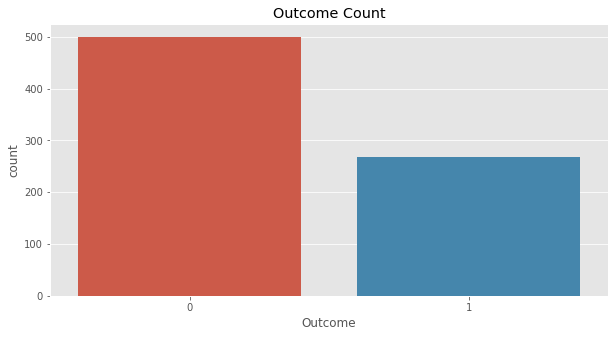

In [15]:
plt.figure(figsize=(10, 5))
sns.countplot(data['Outcome'])
plt.title('Outcome Count')
plt.show()

In [16]:
corr = data.corr()
corr['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

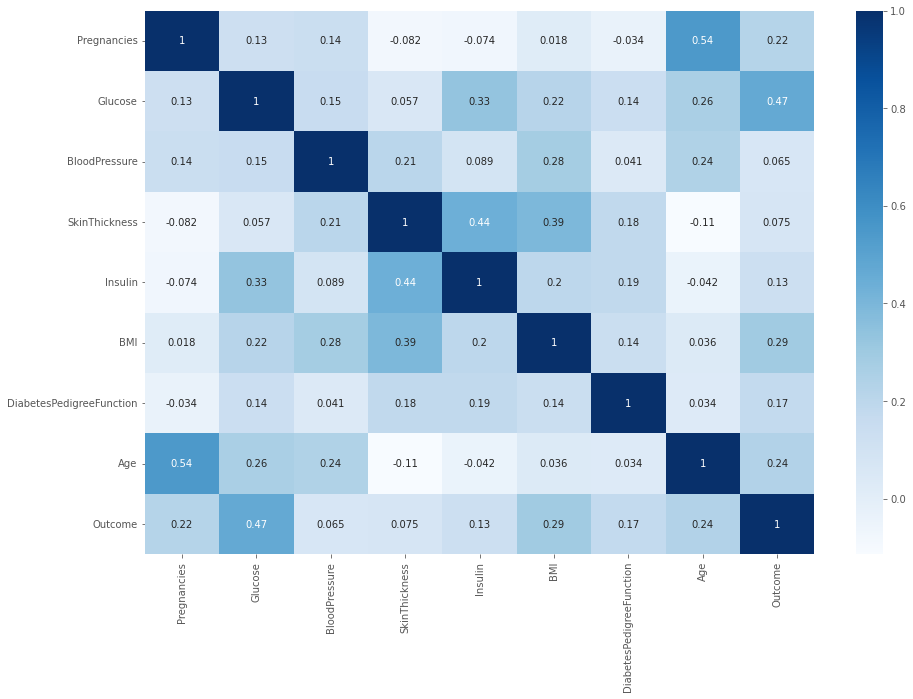

In [17]:
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='Blues')
plt.show()

# ***Data Preprocessing***

**Note**

* We should not scale on target

In [18]:
target = data['Outcome']
data.drop(columns='Outcome', axis=1, inplace=True)

In [19]:
scale = StandardScaler()
newData = pd.DataFrame(scale.fit_transform(data), columns=data.columns)

In [20]:
newData.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [21]:
target.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

# ***Train Test Split***

In [22]:
xtrain, xtest, ytrain, ytest = train_test_split(newData, target, test_size=0.2, random_state=42)

# ***Model Training***

***Support Vector Machine***

In [23]:
svc = SVC()

param = {
    'C': [i for i in range(1, 10)],
    'kernel': ['rbf', 'linear', 'poly']}

grid = GridSearchCV(svc, param, cv=5, scoring='neg_mean_squared_error')
grid.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'kernel': ['rbf', 'linear', 'poly']},
             scoring='neg_mean_squared_error')

In [24]:
SvcModel = grid.best_estimator_
SvcModel.fit(xtrain, ytrain)

SVC(C=2)

In [25]:
svc_cv = cross_val_score(SvcModel, newData, target, cv=5)

In [26]:
print('Scores: ', svc_cv)
print('Mean: ', np.mean(svc_cv))

Scores:  [0.75974026 0.76623377 0.75324675 0.80392157 0.78431373]
Mean:  0.7734912146676851


***RandomForestClassifier***

In [27]:
random = RandomForestClassifier()

parameters = {
    'n_estimators': [100, 200, 300, 400, 500, 600],
    'criterion': ['gini', 'entropy']}
    
gridSearch = GridSearchCV(random, parameters, cv=5, scoring='neg_mean_squared_error')
gridSearch.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [100, 200, 300, 400, 500, 600]},
             scoring='neg_mean_squared_error')

In [28]:
RandomForestModel = gridSearch.best_estimator_
RandomForestModel.fit(xtrain, ytrain)

RandomForestClassifier(n_estimators=600)

In [29]:
random_cv = cross_val_score(RandomForestModel, newData, target, cv=5)

In [30]:
print('Scores: ', random_cv)
print('Mean: ', np.mean(random_cv))

Scores:  [0.75324675 0.71428571 0.77922078 0.83660131 0.77777778]
Mean:  0.7722264663441135


***GradientBoostingClassifier***

In [31]:
GradientModel = GradientBoostingClassifier()
GradientModel.fit(xtrain, ytrain)

GradientBoostingClassifier()

In [32]:
gradient_cv = cross_val_score(GradientModel, newData, target, cv=5)

In [33]:
print('Scores: ', gradient_cv)
print('Mean: ', np.mean(gradient_cv))

Scores:  [0.78571429 0.72077922 0.72077922 0.81045752 0.75163399]
Mean:  0.7578728461081402


***XGBClassifier***

In [34]:
XGBModel = XGBClassifier()
XGBModel.fit(xtrain, ytrain)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:28:12] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [35]:
xgb_cv = cross_val_score(XGBModel, newData, target, cv=5)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:28:12] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:28:12] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:28:13] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:28:13] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:28:13] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [36]:
print('Scores: ', xgb_cv)
print('Mean: ', np.mean(xgb_cv))

Scores:  [0.73376623 0.74675325 0.73376623 0.78431373 0.75816993]
Mean:  0.7513538748832865


# ***Evaluation Models***

In [37]:
def Main(modelName, model, cv):
  print(f'============ {modelName} ============')
  print('Model training error ---> ', np.mean(cv))
  print('َAccuracy ---> ', accuracy_score(ytest, model.predict(xtest)))
  print('ConfusionMatix: \n')
  print(confusion_matrix(ytest, model.predict(xtest)))
  print()
  print(classification_report(ytest, model.predict(xtest)))
  print()

In [38]:
Main('SupportVectorMachine', SvcModel, svc_cv)
Main('RandomForestClassifier', RandomForestModel, random_cv)
Main('GradientBoostingClassifier', GradientModel, gradient_cv)
Main('XGBClassifier', XGBModel, xgb_cv)

============ SupportVectorMachine ============
Model training error --->  0.7734912146676851
َAccuracy --->  0.7207792207792207
ConfusionMatix: 

[[81 18]
 [25 30]]

              precision    recall  f1-score   support

           0       0.76      0.82      0.79        99
           1       0.62      0.55      0.58        55

    accuracy                           0.72       154
   macro avg       0.69      0.68      0.69       154
weighted avg       0.71      0.72      0.72       154


============ RandomForestClassifier ============
Model training error --->  0.7722264663441135
َAccuracy --->  0.7467532467532467
ConfusionMatix: 

[[79 20]
 [19 36]]

              precision    recall  f1-score   support

           0       0.81      0.80      0.80        99
           1       0.64      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.72      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154


==========